In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from shapely import wkt
import numpy as np
from datetime import datetime
import ast  # For safely evaluating string representations of dictionaries

# Load the GML file
file_path = 'county_graph_with_ntl.gml'
G = nx.read_gml(file_path)

# Extract NTL Data for Specific Dates (2024-09-25 and 2024-09-30)
target_dates = ['2024-09-25', '2024-09-30']
differences = {}
data_list = []

# Extract county geometries and NTL average values for the two dates
for node, data in G.nodes(data=True):
    geometry_wkt = data.get('geometry', None)
    ntl_data = data.get('ntl', None)  # Get NTL data (assumed to be a dictionary or string)
    
    # convert string dictionary to dictionary
    ntl_dict = ast.literal_eval(ntl_data)
    
    # print(type(ntl_dict))

    if geometry_wkt and ntl_data:
        try:
            # Parse the geometry
            geometry = wkt.loads(geometry_wkt)
            
            # Parse NTL data and calculate the difference
            ntl_dict = ast.literal_eval(ntl_data)  # Safely evaluate string dictionary
            before = ntl_dict.get(target_dates[0], {}).get(f"{target_dates[0]}_avg", 0)
            after = ntl_dict.get(target_dates[1], {}).get(f"{target_dates[1]}_avg", 0)
            difference = after - before
            
            differences[node] = difference
            # Append data to list
            data_list.append({"geometry": geometry, "difference": difference})
        except Exception as e:
            print(f"Error processing node {node}: {e}")
    
print(differences)

{'Georgia_Appling': -2.0209722222222224, 'Georgia_Atkinson': -2.113469156762875, 'Georgia_Bacon': -1.9005372440830548, 'Georgia_Baker': -0.7858585858585859, 'Georgia_Baldwin': -0.06000664893617014, 'Georgia_Banks': 0.3294014084507051, 'Georgia_Barrow': 2.773012778860732, 'Georgia_Bartow': 0.3384768541562977, 'Georgia_Ben Hill': -1.3791802435259823, 'Georgia_Berrien': -2.3373900018723086, 'Georgia_Bibb': -9.371371083644725, 'Georgia_Bleckley': 0.11131276467029672, 'Georgia_Brantley': -0.573694029850746, 'Georgia_Brooks': -2.184774143302181, 'Georgia_Bryan': -0.708467532467532, 'Georgia_Bulloch': -0.8098603590766595, 'Georgia_Burke': -0.5399385560675887, 'Georgia_Butts': 2.3048582995951428, 'Georgia_Calhoun': -1.4339622641509435, 'Georgia_Camden': 0.7613812544045109, 'Georgia_Candler': -2.4732050841635176, 'Georgia_Carroll': 1.13424059139785, 'Georgia_Catoosa': 0.15056360708534555, 'Georgia_Charlton': -0.6857040229885056, 'Georgia_Chatham': -1.1157308694622117, 'Georgia_Chattahoochee': -

<Figure size 1000x1000 with 0 Axes>

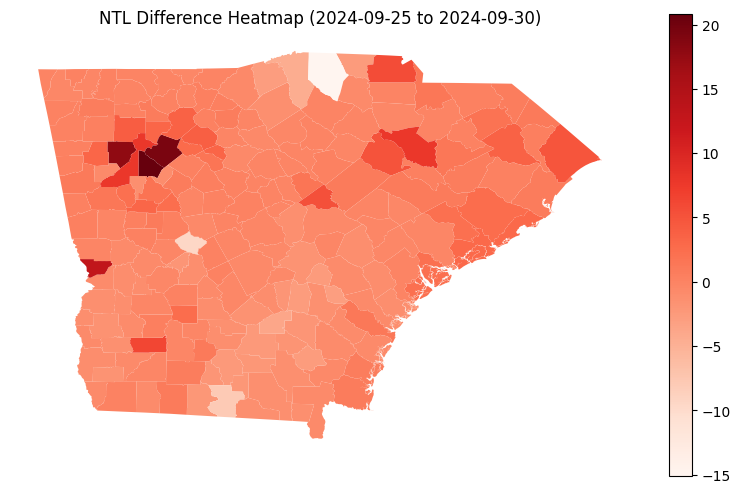

In [2]:
import geopandas as gpd

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(data_list)

# Plot the heatmap
plt.figure(figsize=(10, 10))
gdf.plot(column='difference', cmap='Reds', legend=True, figsize=(10, 6))
plt.title('NTL Difference Heatmap (2024-09-25 to 2024-09-30)')
plt.axis('off')
plt.show()


# Question: is there a problem because no value for one date? und drum value vo öppe 20?

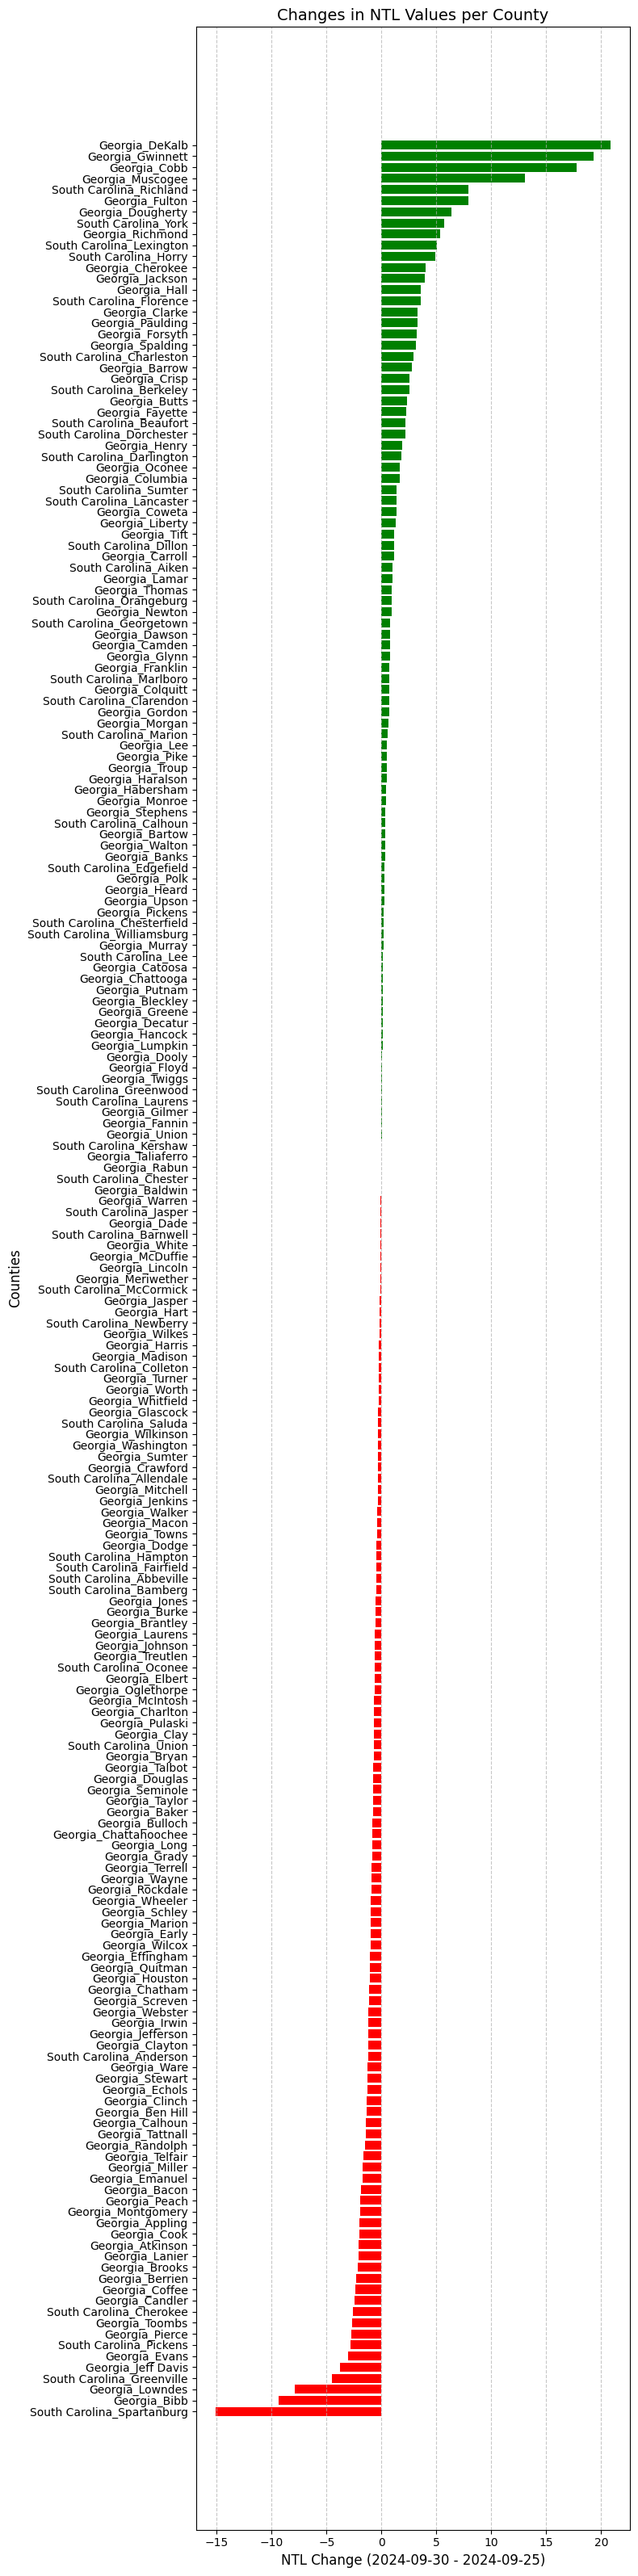

In [3]:
# Sort counties by the difference for better visualization
sorted_differences = dict(sorted(differences.items(), key=lambda item: item[1]))
                                                    
# Extract counties and differences
counties = list(sorted_differences.keys())
changes = list(sorted_differences.values())

# Create a horizontal bar chart
plt.figure(figsize=(8, 32))
colors = ['red' if change < 0 else 'green' for change in changes]
plt.barh(counties, changes, color=colors)

# Add labels and title
plt.xlabel('NTL Change (2024-09-30 - 2024-09-25)', fontsize=12)
plt.ylabel('Counties', fontsize=12)
plt.title('Changes in NTL Values per County', fontsize=14)

# Add grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout to fit labels
plt.tight_layout()

# Show the plot
plt.show()


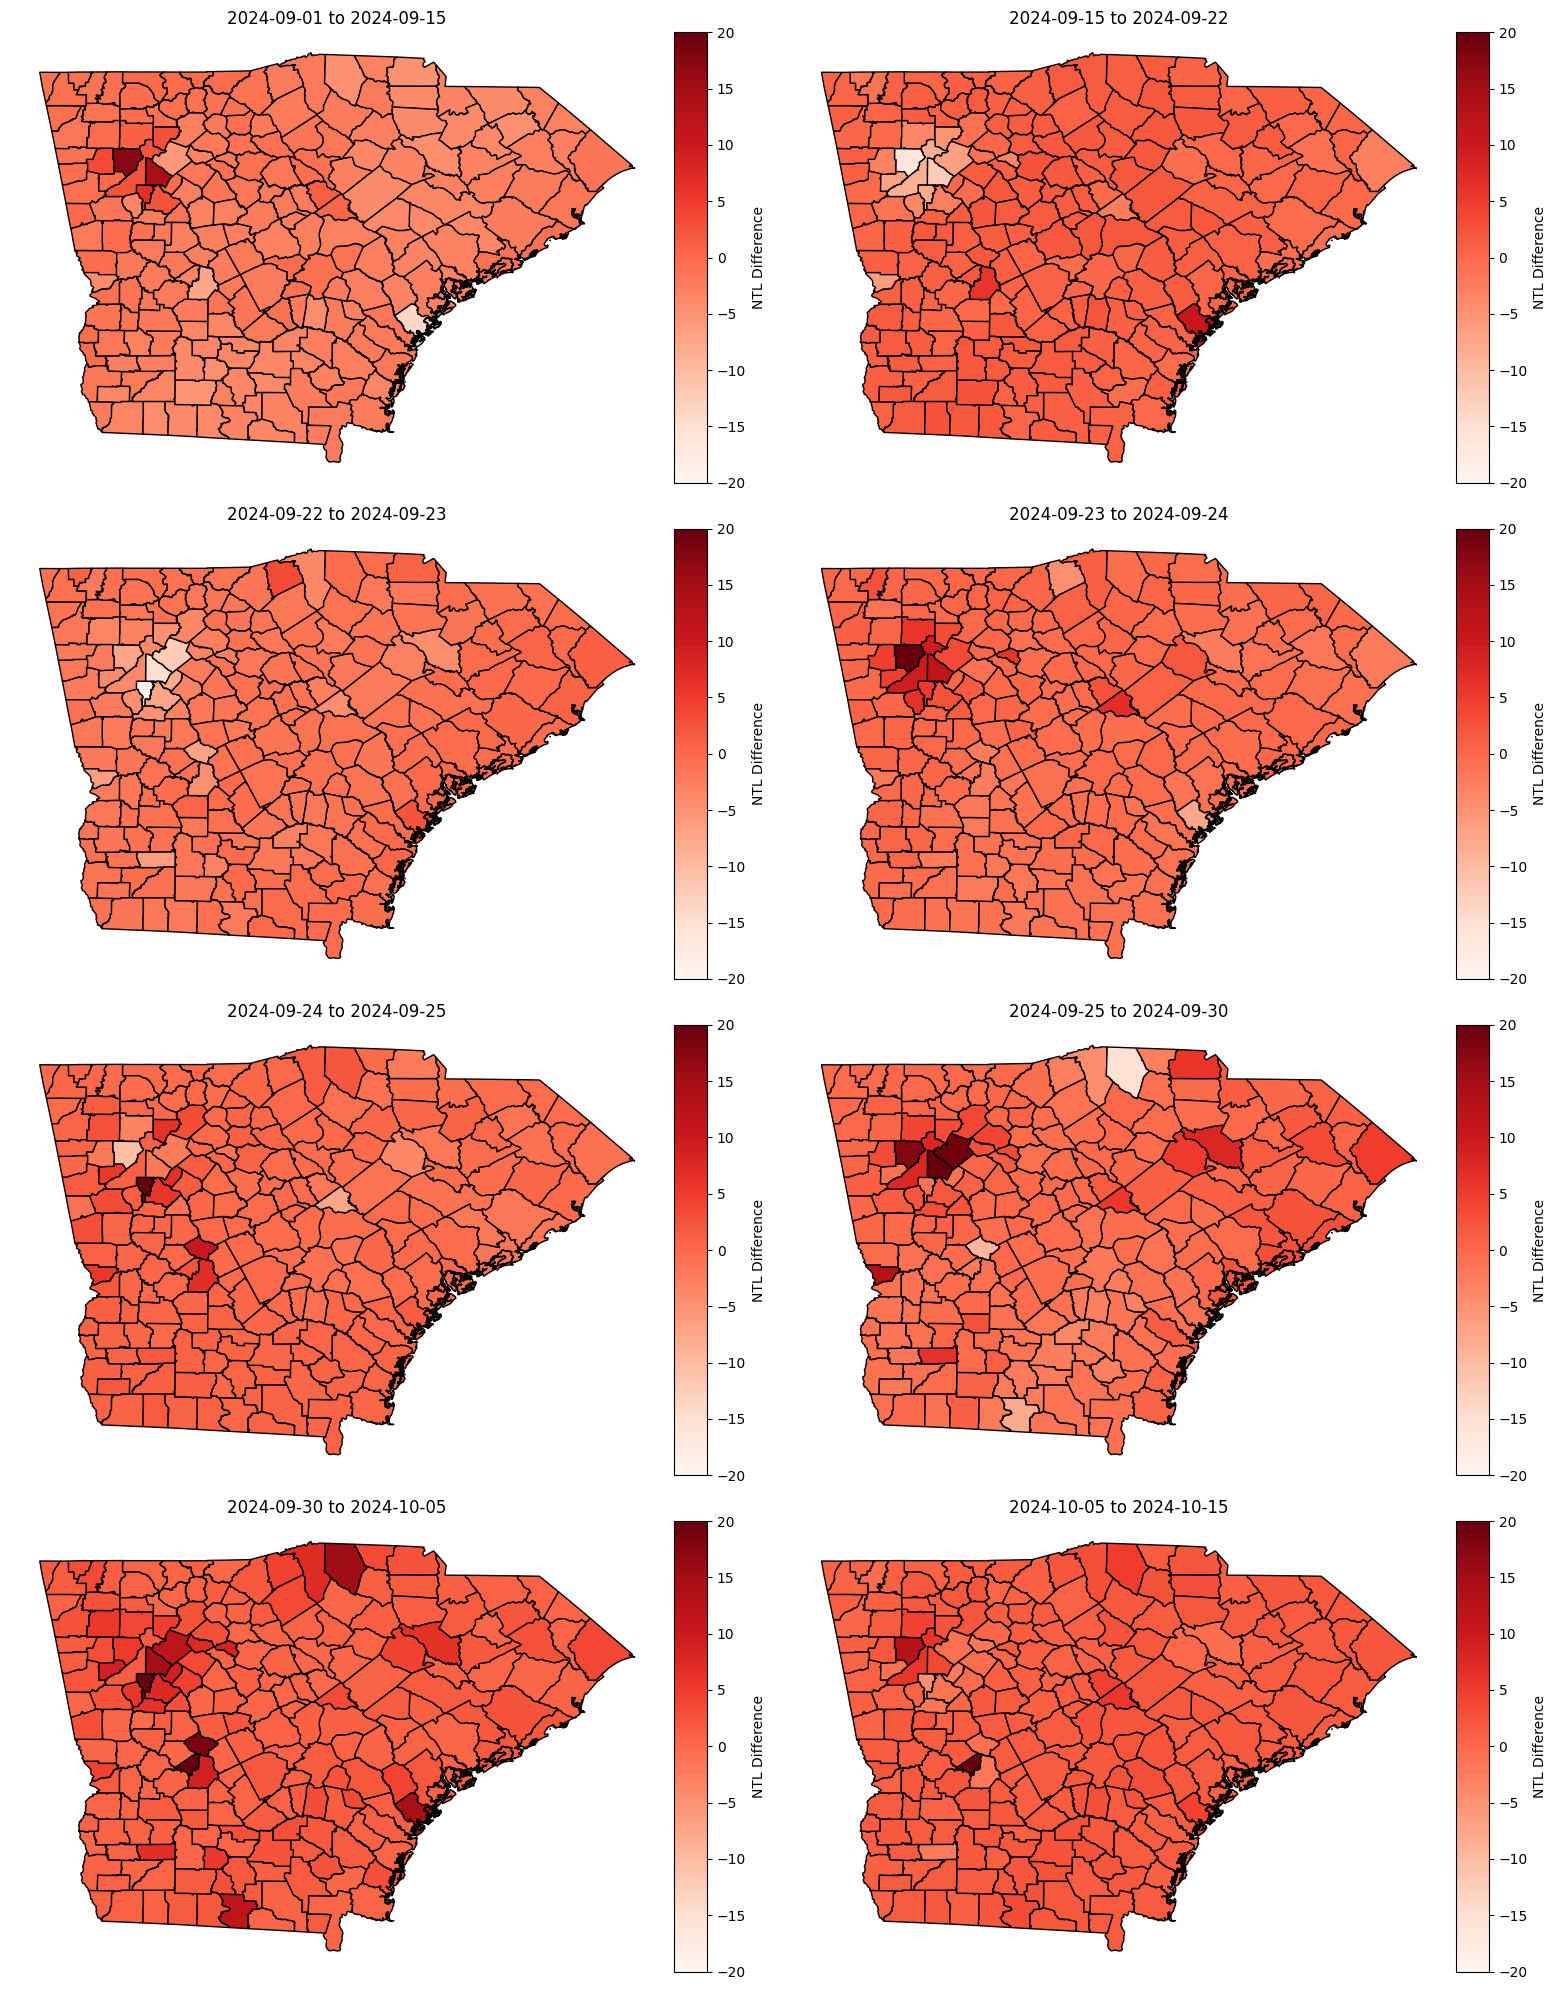

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
from shapely import wkt
import geopandas as gpd
import ast  # For safely evaluating string representations of dictionaries
import numpy as np
from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load the GML file
file_path = 'county_graph_with_ntl.gml'
G = nx.read_gml(file_path)

# Define dates
dates = [
    '2024-09-01', '2024-09-15', '2024-09-22', '2024-09-23',
    '2024-09-24', '2024-09-25', '2024-09-30', '2024-10-05', '2024-10-15'
]
heatmaps = []
all_differences = []

# Calculate differences and store min/max values
for i in range(1, len(dates)):  # Start from the second date
    current_date = dates[i]
    previous_date = dates[i - 1]
    
    differences = []
    for node, data in G.nodes(data=True):
        geometry_wkt = data.get('geometry', None)
        ntl_data = data.get('ntl', None)
        
        if geometry_wkt and ntl_data:
            try:
                # Parse geometry and NTL data
                geometry = wkt.loads(geometry_wkt)
                ntl_dict = ast.literal_eval(ntl_data)  # Safely evaluate string dictionary
                before = ntl_dict.get(previous_date, {}).get(f"{previous_date}_avg", 0)
                after = ntl_dict.get(current_date, {}).get(f"{current_date}_avg", 0)
                difference = after - before
                all_differences.append(difference)
                differences.append({"geometry": geometry, "difference": difference})
            except Exception as e:
                print(f"Error processing node {node}: {e}")
    
    # Create GeoDataFrame for the current difference
    gdf = gpd.GeoDataFrame(differences)
    heatmaps.append((f"{previous_date} to {current_date}", gdf))

# Determine global min and max for uniform legend
norm = Normalize(vmin=-20, vmax=20)

# Plot all heatmaps with uniform legend
fig, axes = plt.subplots(4, 2, figsize=(16, 20))  # 4 rows, 2 columns

for ax, (title, gdf) in zip(axes.flatten(), heatmaps):
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)  # Add colorbar

    gdf.plot(
        column='difference',
        cmap='Reds',
        norm=norm,
        legend=True,
        ax=ax,
        cax=cax,
        edgecolor='black',
        legend_kwds={'label': "NTL Difference", 'orientation': "vertical"}
    )
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# (done) correlation between changes --> tun benachbarte counties in ähnliche richtung sich verändern, 
#  => sind counties mit wenig strom in nähe von counties mit wenig strom (am ende in analysis.ipynb)

# (done) degree distribution --> an wie viele andere grenzen die counties, ... 
# correlation between area und degree von neighbors: average degree vs size plotten und anschauen
# => sanity check (wie ist netzwerk grundsätzlich aufgebaut) (analysis.ipynb -> 2 plots + communities?)

# vergleichen mit vorjahr wegen seasonal changes ==> gleicher tag zu vorjahr --> sieht man einfluss von hurricane

# (done?) is difference correlated with area?  => no

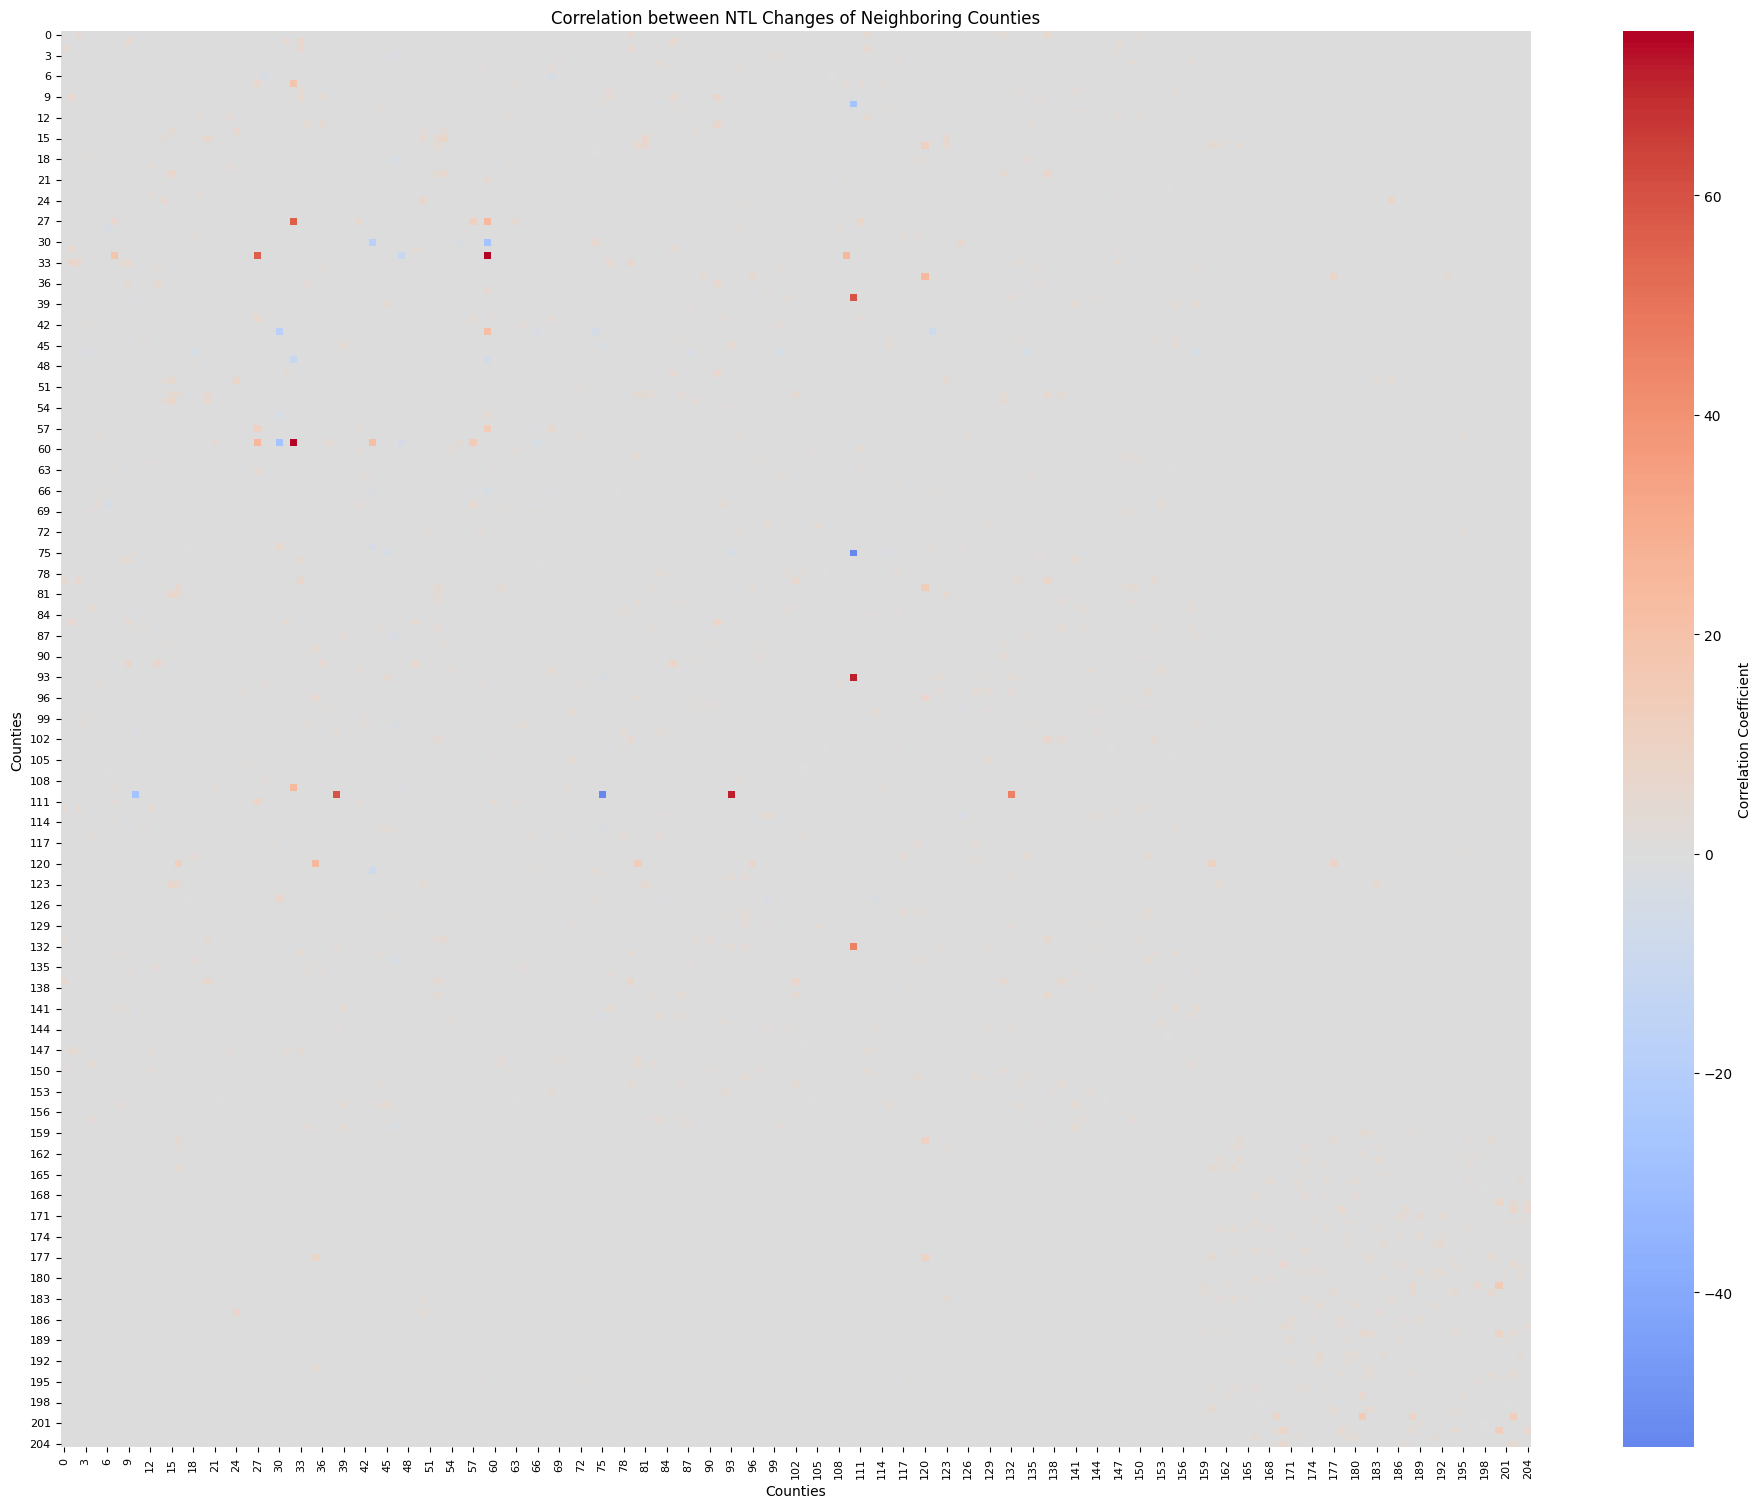

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from shapely import wkt
import ast

# Load the GML file
file_path = 'county_graph_with_ntl.gml'
G = nx.read_gml(file_path)

# Define dates
dates = [
    '2024-09-01', '2024-09-15', '2024-09-22', '2024-09-23',
    '2024-09-24', '2024-09-25', '2024-09-30', '2024-10-05', '2024-10-15'
]

# Dictionary to hold county changes
county_changes = {}

# Calculate differences for each county
for i in range(1, len(dates)):  # Start from the second date
    current_date = dates[i]
    previous_date = dates[i - 1]
    
    for node, data in G.nodes(data=True):
        geometry_wkt = data.get('geometry', None)
        ntl_data = data.get('ntl', None)
        
        if geometry_wkt and ntl_data:
            try:
                # Parse geometry and NTL data
                geometry = wkt.loads(geometry_wkt)
                ntl_dict = ast.literal_eval(ntl_data)  # Safely evaluate string dictionary
                before = ntl_dict.get(previous_date, {}).get(f"{previous_date}_avg", 0)
                after = ntl_dict.get(current_date, {}).get(f"{current_date}_avg", 0)
                difference = after - before
                
                # Store county changes for later correlation analysis
                county_changes[node] = difference
            except Exception as e:
                print(f"Error processing node {node}: {e}")

# Create a list of counties in the order of the graph nodes
county_list = list(G.nodes)

# Create the correlation matrix (initialize it with zeros or NaNs)
num_counties = len(county_list)
correlation_matrix = np.zeros((num_counties, num_counties))

# Calculate the correlation between each pair of neighboring counties
for i, node in enumerate(county_list):
    for j, neighbor in enumerate(county_list):
        if G.has_edge(node, neighbor):
            change_node = county_changes.get(node, 0)
            change_neighbor = county_changes.get(neighbor, 0)
            
            # Using the product of changes as a basic measure of correlation
            correlation_matrix[i, j] = change_node * change_neighbor

# Plot the correlation matrix as a heatmap with all ticks
plt.figure(figsize=(20, 16))  # Increased figure size for more space

sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", center=0, cbar_kws={"label": "Correlation Coefficient"})

plt.title("Correlation between NTL Changes of Neighboring Counties")
plt.xlabel("Counties")
plt.ylabel("Counties")

# Rotate the labels and adjust font size
plt.xticks(rotation=90, ha="center", fontsize=8)
plt.yticks(rotation=0, fontsize=8)

# Increase layout space to avoid clipping
plt.tight_layout(pad=4.0)

# Show the plot
plt.show()
